# Titanic Shipwreck Survival Prediction Project

## 1. Project Definition

### 1.1 Author: Richard Mfitumukiza

### 1.2 Goals
RMS Titanic was a British passenger liner, operated by the White Star Line, which sank in the North Atlantic Ocean on 15 April 1912 after striking an iceberg during her maiden voyage from Southampton, UK, to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, which made the sinking possibly one of the deadliest for a single ship up to that time. It remains to this day the deadliest peacetime sinking of a superliner or cruise ship.[link](https://en.wikipedia.org/wiki/Titanic)  

**The goal of this project is to learn how to use machine learning in disaster management; by predicting who survived the Titanic, based on historical data.**


### 1.3 Objectives
The objective is to use Machine Learning to create a model that predicts which passengers survived the Titanic shipwreck; based on the dataset  available on [Kaggle](https://www.kaggle.com/c/titanic/data).  

### 1.4 Requirements
I am required to:
- use Kaggle [dataset](https://www.kaggle.com/c/titanic/data),
- create a machine learning model,
- save my prediction in a CSV format file,
- submit the file [here](https://www.kaggle.com/c/titanic/submit).


---

## 2. Project Planning Summary

### 2.1 Work breakdown
- use Kaggle [dataset](https://www.kaggle.com/c/titanic/data),
    - Download dataset from kaggle.com to local machine
    - Prepare dataset and make it ready for usage in subsequent steps
- create a machine learning model,
    - Exploratory Data Analysis
        - Raw data exploration
        - Feature engineering
        - Analysis
    - Machine Learning Modelling
        - Split into train, validate, test sets
        - train models
        - neural network models
        - ensemble models
- save my prediction in a CSV format file,
    - use the model on submission data
    - save prediction in a file on local machine
- submit the file [here](https://www.kaggle.com/c/titanic/submit).
    - Deploy
        - submit prediction on kaggle


### 2.2 Resources identification
- Links
    - Competition overview: https://www.kaggle.com/c/titanic/overview
    - context: https://en.wikipedia.org/wiki/Titanic
    - dataset: https://www.kaggle.com/c/titanic/data
    - submission: https://www.kaggle.com/c/titanic/submit

---

## 3. Execution : Data science

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
import bokeh as bk
import bokeh.plotting as bkp

import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingRegressor, StackingClassifier
from sklearn.metrics import accuracy_score

print('Numpy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('Matplotlib version:',mpl.__version__)
print('Seaborn version:',sb.__version__)
print('Bokeh version:',np.__version__)
print('sklearn version:',np.__version__)

Numpy version: 1.21.2
Pandas version: 1.3.5
Matplotlib version: 3.5.0
Seaborn version: 0.11.2
Bokeh version: 1.21.2
sklearn version: 1.21.2


Read Data

In [2]:
train_url = "https://raw.githubusercontent.com/richardmfitumukiza/Titanic-dataset/main/train.csv"
prod_url = "https://raw.githubusercontent.com/richardmfitumukiza/Titanic-dataset/main/test.csv"


training_df = pd.read_csv(train_url)
training_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
testing_df = pd.read_csv(prod_url)
testing_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
training_df.shape

(891, 12)

In [5]:
training_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Cleaning data

In [7]:
training_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Fill in missing age with average age

In [8]:
training_df['Age'].fillna(training_df['Age'].mean(), inplace=True)
training_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
training_df.groupby(training_df['Cabin'].isnull())['Survived'].mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

cabin status to numeric format

In [10]:
training_df['Cabin'] = np.where(training_df['Cabin'].isnull(), 0,1)
training_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,1,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,1,C


gender to numeric format

In [11]:
gender_num = {'male':0, 'female':1}

training_df['Sex'] = training_df['Sex'].map(gender_num)
training_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,1,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,1,C


<Figure size 432x288 with 0 Axes>

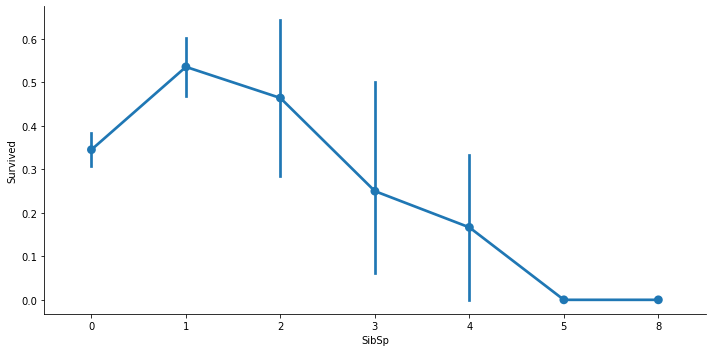

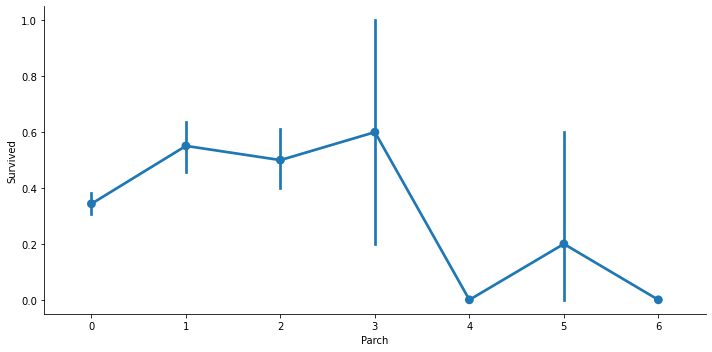

In [12]:
for i, col in enumerate(['SibSp', 'Parch']):
    plt.figure(i)
    sb.catplot(x=col, y='Survived', data=training_df, kind='point', aspect=2)

Combining correlated features

In [13]:
training_df['Fam_size'] = training_df['SibSp']+training_df['Parch']
training_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fam_size
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1,C,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,1,S,1
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,0,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,1,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,0,S,3
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,1,C,0


drop unnecessary features

In [14]:
training_df.drop(['SibSp', 'Parch', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
training_df

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Fam_size
0,1,0,3,0,22.000000,7.2500,0,1
1,2,1,1,1,38.000000,71.2833,1,1
2,3,1,3,1,26.000000,7.9250,0,0
3,4,1,1,1,35.000000,53.1000,1,1
4,5,0,3,0,35.000000,8.0500,0,0
...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000000,13.0000,0,0
887,888,1,1,1,19.000000,30.0000,1,0
888,889,0,3,1,29.699118,23.4500,0,3
889,890,1,1,0,26.000000,30.0000,1,0


Data splitting

In [15]:
df = training_df 
df

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Fam_size
0,1,0,3,0,22.000000,7.2500,0,1
1,2,1,1,1,38.000000,71.2833,1,1
2,3,1,3,1,26.000000,7.9250,0,0
3,4,1,1,1,35.000000,53.1000,1,1
4,5,0,3,0,35.000000,8.0500,0,0
...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000000,13.0000,0,0
887,888,1,1,1,19.000000,30.0000,1,0
888,889,0,3,1,29.699118,23.4500,0,3
889,890,1,1,0,26.000000,30.0000,1,0


In [16]:
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

Saving split data

## Training

K-Nearest-Neighbors Classifier Model

In [17]:
knn = KNeighborsClassifier()
parameters = {
    'n_neighbors': np.arange(1,10)
}

knn_cv = GridSearchCV(knn, parameters, cv=5)
knn_cv.fit(X_train, y_train)
knn_model = knn_cv.best_estimator_
acc = knn_model.score(X_val, y_val)

print(knn_model)
print(f'Accuracy: {acc:.2%}')


KNeighborsClassifier(n_neighbors=2)
Accuracy: 78.20%


#### Logistic Regression Model

In [18]:
lr = LogisticRegression()
parameters = {
    'C': np.arange(0.1, 1, 0.1),
    'max_iter': [2000]
}

lr_cv = GridSearchCV(lr, parameters, cv=5)
lr_cv.fit(X_train, y_train)
lr_model = lr_cv.best_estimator_
acc = lr_model.score(X_val, y_val)

print(lr_model)
print(f'Accuracy: {acc:.2%}')

LogisticRegression(C=0.5, max_iter=2000)
Accuracy: 80.00%


#### Support Vector Machine

In [19]:
svc = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': np.arange(0.01, 0.1, 0.01) #[0.1, 1, 10]
}

svc_cv = GridSearchCV(svc, parameters, cv=5)
svc_cv.fit(X_train, y_train)
svc_model = svc_cv.best_estimator_
acc = svc_model.score(X_val, y_val)

print(svc_model)
print(f'Accuracy: {acc:.2%}')

SVC(C=0.04, kernel='linear')
Accuracy: 78.43%


#### Random Forest

In [20]:
rf = RandomForestClassifier()
parameters = {
    'max_depth': np.arange(2,6), #[2, 4, 8, 16, 32, None]
    'n_estimators': np.arange(240,260) #[5, 50, 250],
}

rf_cv = GridSearchCV(rf, parameters, cv=5)
rf_cv.fit(X_train, y_train)
rf_model = rf_cv.best_estimator_
acc = rf_model.score(X_val, y_val)

print(rf_model)
print(f'Accuracy: {acc:.2%}')

RandomForestClassifier(max_depth=5, n_estimators=255)
Accuracy: 88.31%


#### Gradient booster

In [21]:
gb = GradientBoostingClassifier()
parameters = {
    'learning_rate': np.arange(0.008, 0.012, 0.001), #[0.01, 0.1, 1, 10, 100],
    'n_estimators': np.arange(620,640) #[5, 50, 250, 500],
}

gb_cv = GridSearchCV(gb, parameters, cv=5)
gb_cv.fit(X_train, y_train)
gb_model = gb_cv.best_estimator_
acc = gb_model.score(X_val, y_val)

print(gb_model)
print(f'Accuracy: {acc:.2%}')

GradientBoostingClassifier(learning_rate=0.009000000000000001, n_estimators=622)
Accuracy: 88.76%


Deep Learning : Multilayer Perceptron

In [22]:
mlp = MLPClassifier()
parameters = {
    'hidden_layer_sizes': [(15,),(20,),(25,)], #[(10,), (50,), (100,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': np.arange(2095,2115) #[2000]
}

mlp_cv = GridSearchCV(mlp, parameters, cv=5)
mlp_cv.fit(X_train, y_train)
mlp_model = mlp_cv.best_estimator_
acc = mlp_model.score(X_val, y_val)

print(mlp_model)
print(f'Accuracy: {acc:.2%}')

MLPClassifier(activation='logistic', hidden_layer_sizes=(20,),
              learning_rate='adaptive', max_iter=2105)
Accuracy: 80.67%


#### Stack

In [23]:


base_learners = [
    ('knn', knn_model),
    ('lr', lr_model),
    ('sv', svc_model),
    ('rf', rf_model),
    ('gb', gb_model),
    ('mlp', mlp_model)
]

master_learner = LogisticRegression()

s_model = StackingClassifier(estimators=base_learners, final_estimator=master_learner, cv=5)
s_model.fit(X_train, y_train)
acc = s_model.score(X_val, y_val)
print(f'Accuracy: {acc:.2%}')

Accuracy: 88.09%


The best estimator is **Gradient Booster** with **Accuracy: 88.54%**

---

## Production

In [24]:
acc = gb_model.score(X_test, y_test)
print(f' Test Accuracy: {acc:.2%}')

 Test Accuracy: 82.51%


Production data feature engineering

In [25]:
testing_df['Age'].fillna(testing_df['Age'].mean(), inplace=True)
testing_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [26]:
testing_df['Cabin'] = np.where(testing_df['Cabin'].isnull(), 0,1)
testing_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,0,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,0,Q
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,0,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,0,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,1,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,0,S
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,0,S


In [27]:
gender_num = {'male':0, 'female':1}

testing_df['Sex'] = testing_df['Sex'].map(gender_num)
testing_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.50000,0,0,330911,7.8292,0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.00000,1,0,363272,7.0000,0,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.00000,0,0,240276,9.6875,0,Q
3,895,3,"Wirz, Mr. Albert",0,27.00000,0,0,315154,8.6625,0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.00000,1,1,3101298,12.2875,0,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,30.27259,0,0,A.5. 3236,8.0500,0,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.00000,0,0,PC 17758,108.9000,1,C
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,0,S
416,1308,3,"Ware, Mr. Frederick",0,30.27259,0,0,359309,8.0500,0,S


In [28]:
testing_df['Fam_size'] = testing_df['SibSp']+testing_df['Parch']
testing_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fam_size
0,892,3,"Kelly, Mr. James",0,34.50000,0,0,330911,7.8292,0,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.00000,1,0,363272,7.0000,0,S,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.00000,0,0,240276,9.6875,0,Q,0
3,895,3,"Wirz, Mr. Albert",0,27.00000,0,0,315154,8.6625,0,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.00000,1,1,3101298,12.2875,0,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,30.27259,0,0,A.5. 3236,8.0500,0,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.00000,0,0,PC 17758,108.9000,1,C,0
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,0,S,0
416,1308,3,"Ware, Mr. Frederick",0,30.27259,0,0,359309,8.0500,0,S,0


In [29]:
testing_df.drop(['SibSp', 'Parch', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
testing_df

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Fam_size
0,892,3,0,34.50000,7.8292,0,0
1,893,3,1,47.00000,7.0000,0,1
2,894,2,0,62.00000,9.6875,0,0
3,895,3,0,27.00000,8.6625,0,0
4,896,3,1,22.00000,12.2875,0,2
...,...,...,...,...,...,...,...
413,1305,3,0,30.27259,8.0500,0,0
414,1306,1,1,39.00000,108.9000,1,0
415,1307,3,0,38.50000,7.2500,0,0
416,1308,3,0,30.27259,8.0500,0,0


In [30]:
testing_df.Fare.isnull().unique()
testing_df[testing_df.Fare.isnull()]
testing_df.loc[152,'Fare'] = 0
testing_df.loc[152,'Fare']

0.0

In [32]:
y_pred = gb_model.predict(testing_df)
submission = pd.DataFrame(zip(testing_df.PassengerId, y_pred), columns=['PassengerId', 'Survived'])
submission
submission.to_csv('subm.csv', index=False)

**END**